- On va adapter la régression linéaire au cas de la classification en interprétant la prédiction de la régression linéaire, comme une des catégories de la variable cible.

Imaginons une fonction f qui projette y dans l'intervalle [0,1] : z=f(y)=f(ax+b)
- On peut interpréter la variable z comme étant la probabilité que la prédiction soit dans une des catégories. En considérant par exemple un seuil de classification de 0.5 :

si   f(y) &lt; 0.5
   alors catégorie 0

si   f(y) &gt;= 0.5
   alors catégorie 1

- Cette fonction de projection de toute valeur réelle dans l'intervalle [0,1] existe : 

elle s'appelle la <strong>fonction logistique.</strong>

<font color="lightyellow">

Plus précisément, une régression logistique dans un cas de classification binaire de prédiction consiste à :

1. modéliser une régression linéaire ;

2. projeter la prédiction y variable dans l'intervalle [0,1]: logistique(y) ;

3. interpréter logistic(y) comme probabilité que y soit dans une catégorie ou dans l'autre 
en fonction d'un seuil t=0,5 :

    - si logistique(y) < 0.5 => catégorie 0,

    - si logistique(y) >= 0.5 => catégorie 1.

</font>

Teston la régression logistique avec le modèle de sklearn LogisticRegression.

dataset du cancer du sein a 569 échantillons, 30 prédicteurs et une variable cible binaire : 

la tumeur est maligne (1) ou bénigne (0).

In [1]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=808).fit(X, y)

C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regardons 2 échantillons en particulier et leur prédiction :

In [2]:
clf.predict([X[8, :]])

array([0])

On obtient 0 : bénigne

In [3]:
clf.predict([X[13, :]])

array([1])

On obtient 1 : maligne.

On peut aussi obtenir la probabilité de prédiction de chaque échantillon avec la fonction  predict_proba()  qui donne la paire de probabilité pour 0 et 1.

Note dans le cas binaire : p(0) + p(1) = 1

In [5]:
clf.predict_proba([X[8, :]])

array([[0.6823463, 0.3176537]])

=> soit 68,2% d'appartenir à la classe 0 et 31,8% d'appartenir à la classe 1.

In [6]:
clf.predict_proba([X[13, :]])

array([[0.12734444, 0.87265556]])

=> soit 12,7% d'appartenir à la classe 0 et 87,3% d'appartenir à la classe 1.

Le modèle semble moins fiable au niveau de sa classification pour l'échantillon 8 que pour l'échantillon 13.

- Un bon moyen d'analyser les performances d'un modèle de classification consiste à tracer l'histogramme des probabilités des prédictions.

<Axes: ylabel='Count'>

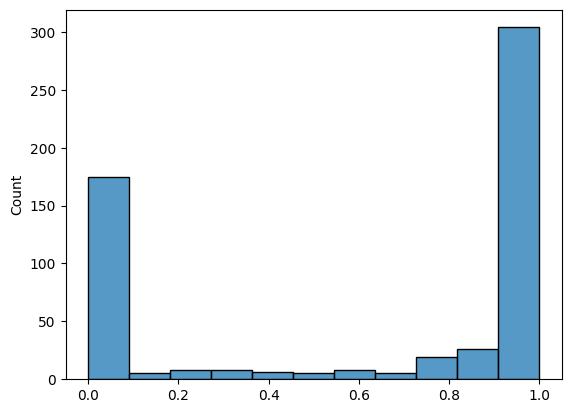

In [7]:
y_hat_proba = clf.predict_proba(X)[:,1]

import seaborn as sns
sns.histplot(y_hat_proba)

- Le modèle est assez fiable au niveau de ses prédictions, la plupart des prédictions ont une probabilité proche de 0 ou de 1.

- Pour un mauvais modèle nous aurions par exemple des prédictions moins clairement espacées. Par exemple, ici, la majorité des prédictions ont une probabilité entre 0,55 et 0,65. Le modèle est moins fiable.

#### Évaluez la performance d'un modèle de classification

Le plus simple pour mesurer la performance d'une classification est de regarder le nombre d'échantillons qui ont été correctement classés. C'est l'exactitude (accuracy, en anglais).

exactitude = échantillons bien classés / échantillons au total

Remarque = Attention : On parle aussi de “précision” en français pour désigner l'exactitude. Mais la précision correspond aussi à une autre métrique de classification (en anglais et en français), comme nous allons le voir. Donc dans la suite j'utiliserai “exactitude” en français au lieu de “précision”, même si le terme est moins courant.

Reprenons le modèle de régression logistique que nous venons d'entraîner, et obtenons ses prédictions :

In [8]:
y_pred = clf.predict(X)

Son exactitude est alors :

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9472759226713533

=> 94,7% ! C'est un bon score pour une simple régression logistique.

- Ce modèle est-il biaisé ou objectif ? 
- A-t-il tendance à classer plutôt les 0 en 1 ou les 1 en 0 ?

Pour voir cela on fait appel à la matrice de confusion, 
un tableau 2x2 avec en colonnes le nombre de valeurs vraies et en rangées le nombre de valeurs prédites :

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[193,  19],
       [ 11, 346]], dtype=int64)

Attention ! Dans la version de scikit-learn, la répartition des éléments de la matrice de confusion est différente. Pour scikit-learn on a une inversion du positif et du négatif :

TP : true positive, vrai positif : échantillons positifs prédits comme positifs.

FN : false negative, faux négatif : échantillons positifs prédits comme négatifs de façon erronée.

TN : true negative, vrai négatif : échantillons négatifs prédits comme négatifs.

FP : false positive, faux positif : échantillons négatifs prédits comme positifs de façon erronée.


- La diagonale contient le nombre d'échantillons bien classés.

- Hors diagonale, le nombre des échantillons mal classés.

où

TP : true positive, vrai positif : échantillons positifs prédits comme positifs.

FP : false positive, faux positif : échantillons négatifs prédits comme positifs de façon erronée.

TN : true negative, vrai négatif : échantillons négatifs prédits comme négatifs.

FN : false negative, faux négatif : échantillons positifs prédits comme négatifs de façon erronée.

À partir des métriques TP, TN, FP, FN, on définit de nombreuses métriques adaptées à des problématiques et des interprétations spécifiques, dont le “rappel” et la “précision”.

#### - Le rappel = TP / (TP + FN) (recall en anglais)
Le rappel est adapté pour minimiser les faux négatifs, quand les conséquences de manquer des instances positives sont graves.

#### - La précision = TP / (TP + FP)
La précision est adaptée quand on souhaite minimiser les faux positifs.

#### Le paradoxe de l'exactitude

Il y a parfois un fort déséquilibre entre les cas négatifs et les positifs dans le dataset. Par exemple dans la détection de pannes de machines, de maladies ou de fraudes.

Prenons par exemple le cas d'un dataset de fraude avec 1 % des échantillons correspondant au cas positif où il n'y a pas de fraude.

Un modèle de prédiction simpliste et absurde qui prédit qu'il n'y a jamais de fraude aura une exactitude de 99 %. Un score excellent mais qui évidemment ne sert à rien. D'où l'intérêt d'avoir des métriques de classification adaptées à chaque type de situation.

Les scores obtenus sont dépendants du seuil de classification mentionné auparavant.

Par défaut, on considère un seuil de  t=0.5
   : si la probabilité prédite   <0.5
   alors la prédiction est la catégorie 0, sinon 1. 
   
   Mais on peut considérer d'autres valeurs pour ce seuil.

Comparons les résultats obtenus pour 2 autres seuils. Par exemple   t=0.3
   et   t=0.7
  .

Pour obtenir les catégories prédites avec ces seuils, on part des probabilités prédites par le modèle :

In [11]:
y_hat_proba = clf.predict_proba(X)[:,1]

On obtient les catégories relatives pour les 2 seuils :

In [12]:
y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba ]
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba ]

On a alors les matrices de confusion suivantes :

- pour 0,3 :

In [16]:
confusion_matrix(y, y_pred_03)

array([[186,  26],
       [  6, 351]], dtype=int64)

- pour 0,7 :

In [18]:
confusion_matrix(y, y_pred_07)

array([[200,  12],
       [ 18, 339]], dtype=int64)

- Les recalls et précisions sont récapitulés dans le tableau suivant :

In [23]:
from sklearn.metrics import precision_score, recall_score

- exactitude

In [24]:
accuracy_score(y, y_pred)

0.9472759226713533

- précision

In [25]:
precision_score(y, y_pred)

0.947945205479452

- rappel

In [26]:
recall_score(y, y_pred)

0.969187675070028

=> Notre modèle étant très performant, les différences de score sont faibles, mais on observe bien une dépendance vis-à-vis des seuils utilisés.

#### ROC AUC. (Receiver Operating Characteristic)

Une métrique de classification assez généraliste pour être utilisable dans la plupart des cas.

- L'idée est de tracer le rappel ou TPR (true positive rate) par rapport au FPR (false positive rate) en fonction des seuils de classification. 

- Le TPR est défini par TP / (TP + FN) et le FPR (false positive rate) est défini par FP (FP + TN).

- La courbe obtenue est appelée Receiver Operating Characteristic (ou ROC), ou encore fonction d’efficacité du récepteur.

- Le graphe suivant montre le ROC d'un bon modèle et d'un mauvais modèle :

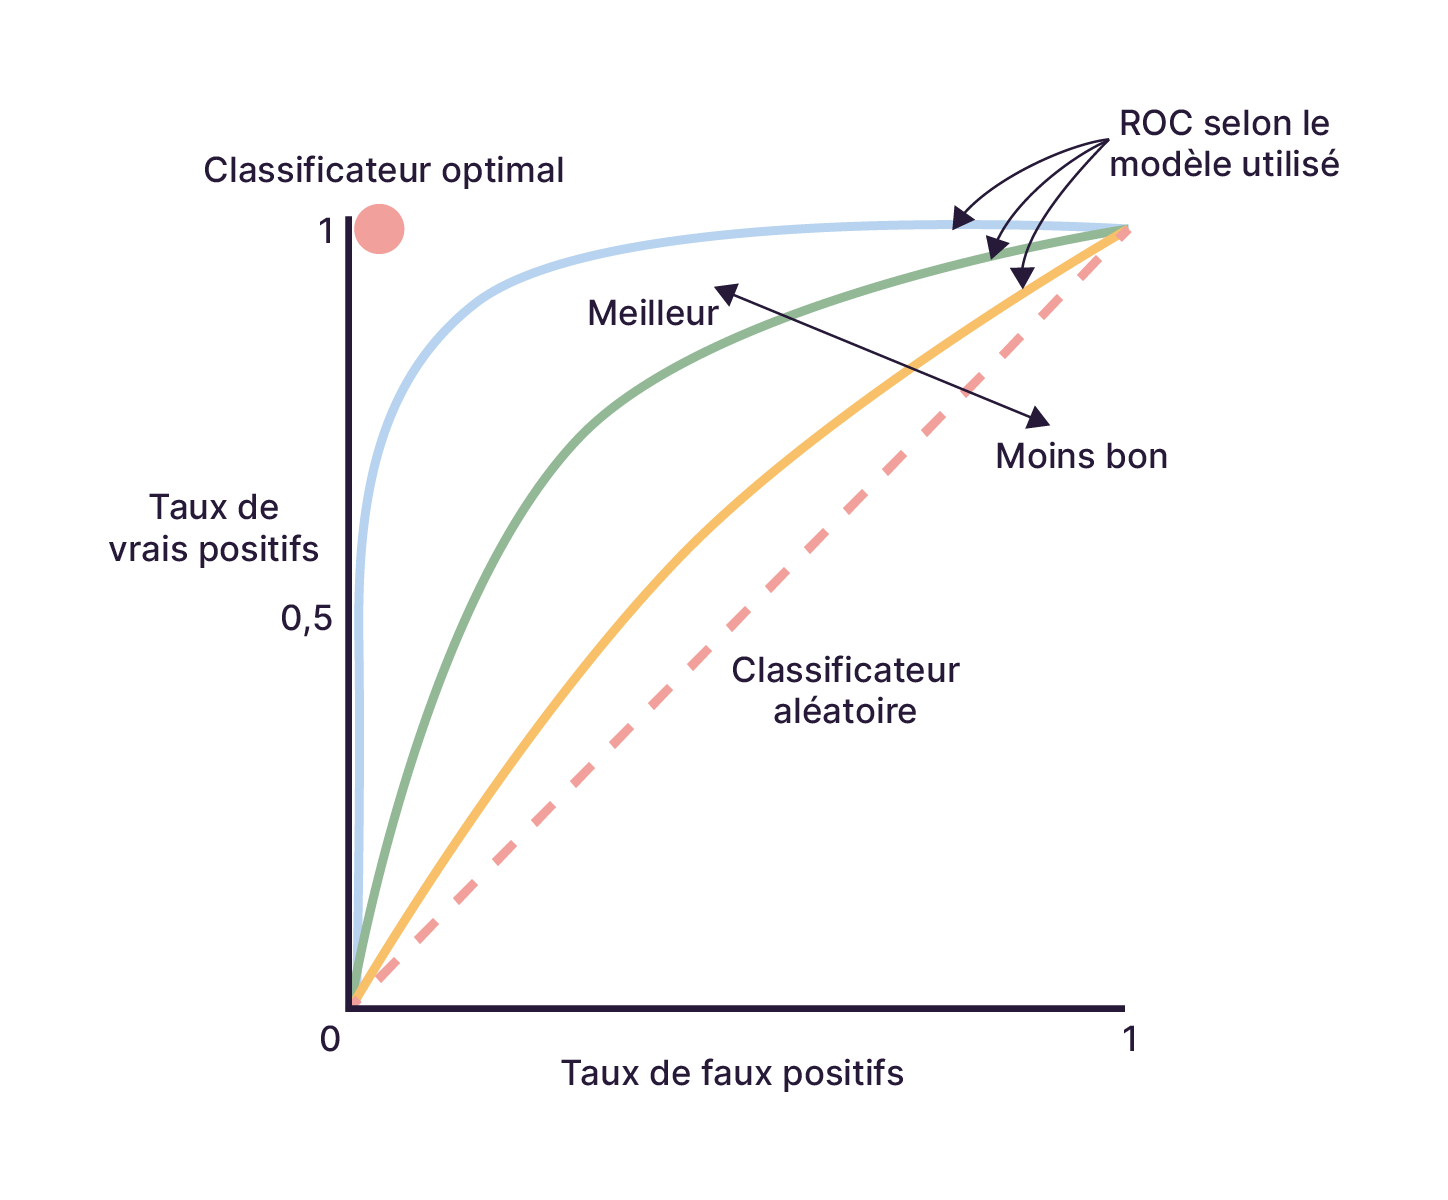

Dans scikit-learn, il s'agit de la fonction "roc_auc_score"

In [31]:
from sklearn.metrics import roc_auc_score

In [35]:
roc_auc_score(y, y_pred).round(2)

0.94

Pour notre modèle, on a une ROC-AUC de >> 0.94

Excellent !

Pour tracer la courbe ROC :

Text(0.5, 1.0, 'ROC - LogisticRegression - Breast Cancer dataset')

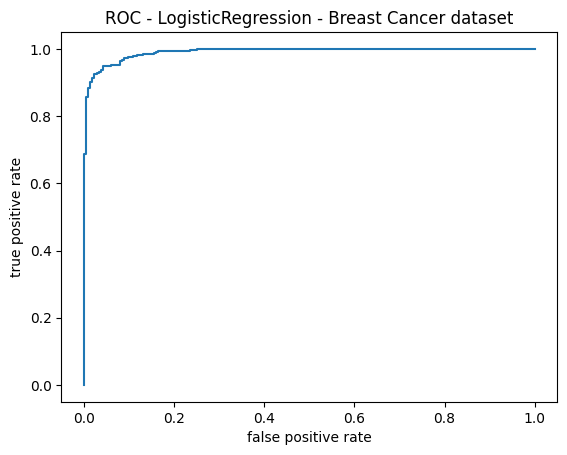

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_hat_proba)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC - LogisticRegression - Breast Cancer dataset")

************************************************* END OF BREAST CANCER *********************************************

***************************************** IRIS **************************************************

In [38]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [40]:
# partager les données pour train et test
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [42]:
# entrainons le modele
clf = LogisticRegression(random_state=8).fit(X_train, y_train)

In [43]:
# prediction sur le set de test
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [44]:
# Matrice de confusion
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  2,  9]], dtype=int64)

=> Comme il y a 3 classes à prédire, la matrice de confusion est une matric 3x3

In [46]:
print("ROC-AUC : ", roc_auc_score(y_test, clf.predict_proba(X_test),multi_class='ovr'))

ROC-AUC :  0.9832071761896323


#### classification report

- Le classification report donne differentes metriques pour chacune des classes.

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

